<center><h1>HW1</h1> Vivek Lakhani [8836256233]</center>
<center><font size="4">Vertebral Column Data Set</font></center>

### (a) Download Data

Package imports

In [52]:
# !pip install matplotlib numpy pandas seaborn scipy scikit-learn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import math
from scipy.io import arff
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

Get the Vertebral Column Data Set

In [7]:
!mkdir -p vertebral_column_data
!curl -o vertebral_column_data/vertebral_column.zip https://archive.ics.uci.edu/static/public/212/vertebral+column.zip
!unzip vertebral_column_data/vertebral_column.zip -d vertebral_column_data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33251    0 33251    0     0   171k      0 --:--:-- --:--:-- --:--:--  171k
Archive:  vertebral_column_data/vertebral_column.zip
  inflating: vertebral_column_data/column_2C.dat  
  inflating: vertebral_column_data/column_2C_weka.arff  
  inflating: vertebral_column_data/column_3C.dat  
  inflating: vertebral_column_data/column_3C_weka.arff  


In [31]:
# Load Data
data = arff.loadarff('vertebral_column_data/column_2C_weka.arff')
# Convert into Dataframe
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


### (b) Pre-Processing and Exploratory Data Analysis

In [32]:
# Convert byte strings in the 'class' column to standard strings
df['class'] = df['class'].str.decode("utf-8")

# Define a mapping for class labels: 'Normal' → 0, 'Abnormal' → 1
class_mapping = {"Normal": 0, "Abnormal": 1}

# Apply the mapping to update class labels
df_labeled = df.replace({'class': class_mapping})


df_labeled

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


#### i. Scatterplots

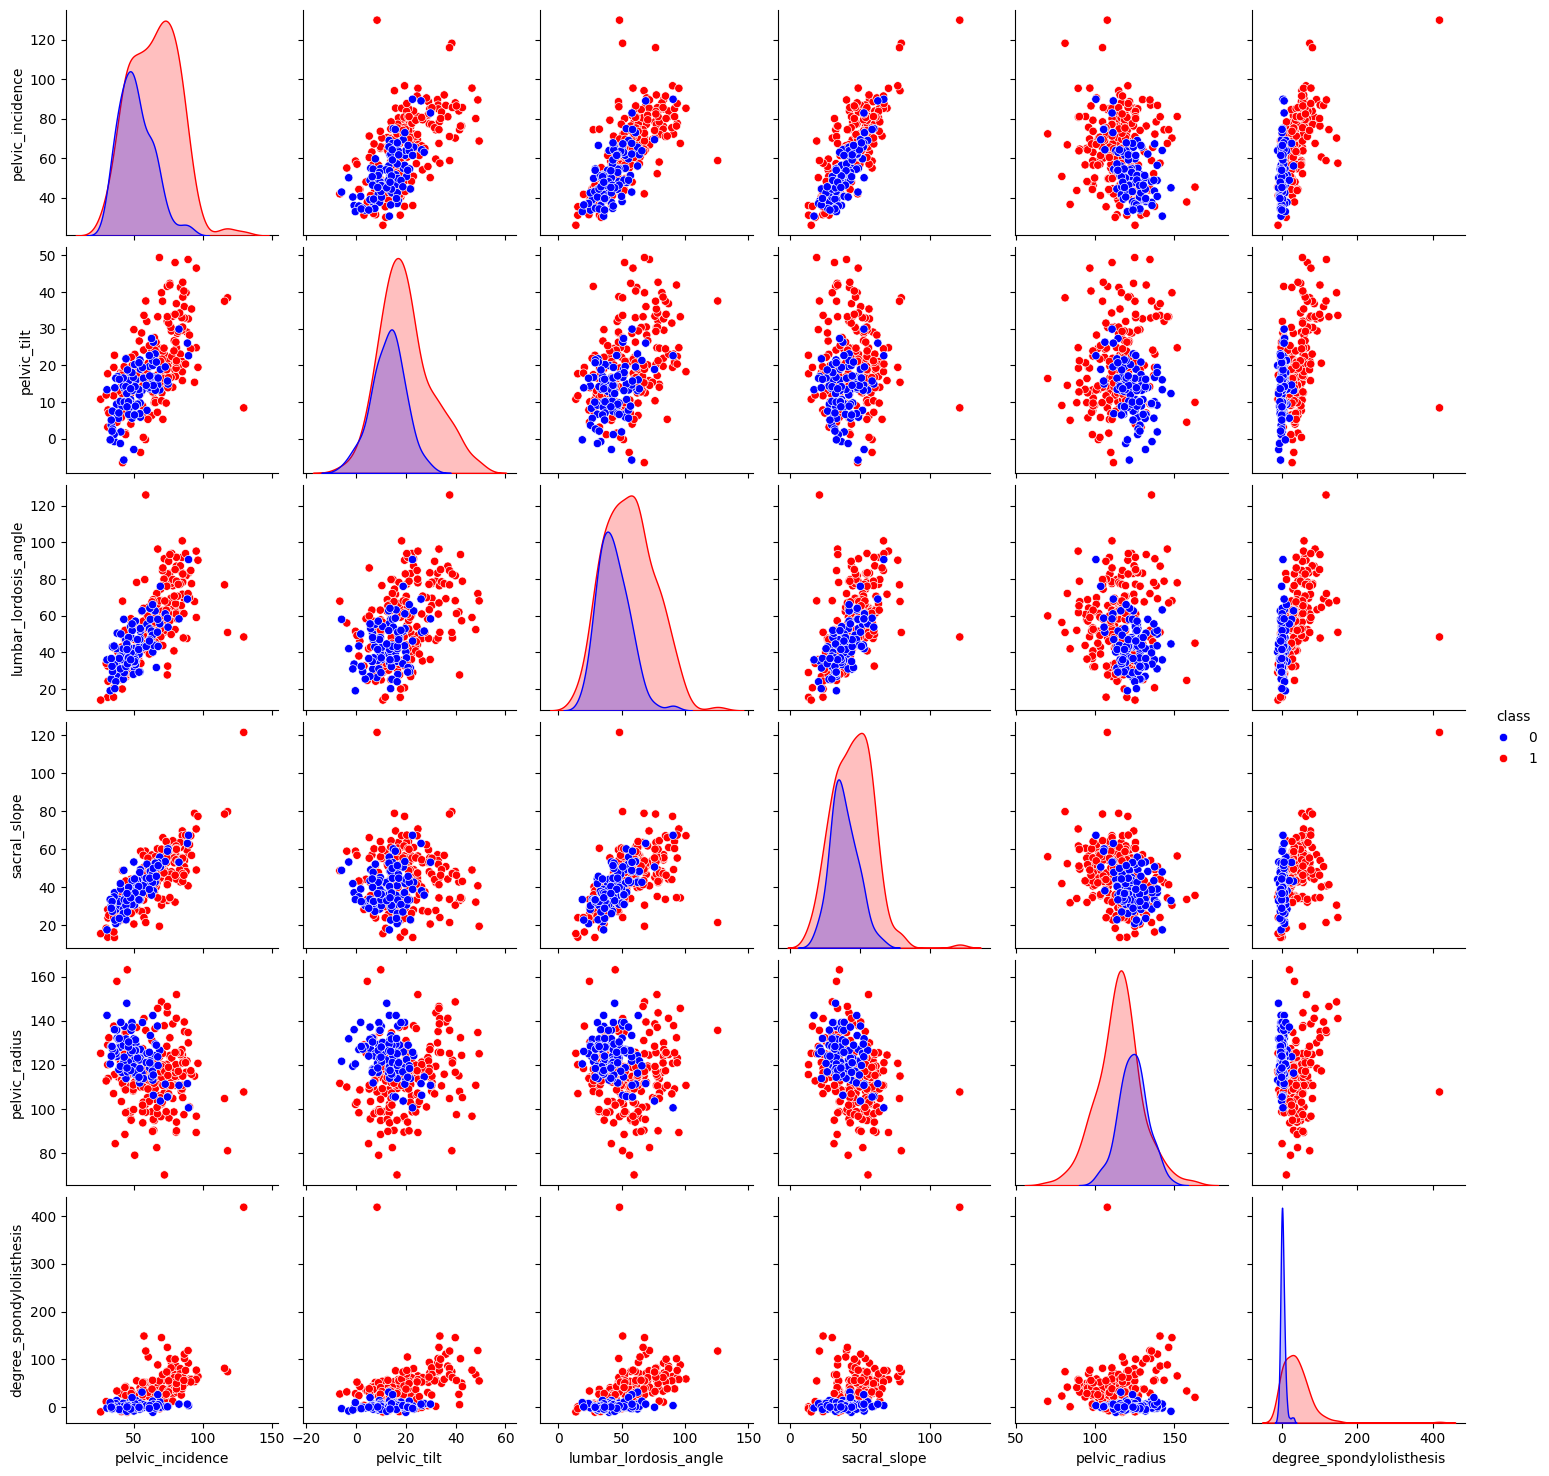

In [33]:
# Assinging Colors
colors = {0: 'blue', 1: 'red'}

# Create scatter plots for each pair of independent variables
sns.pairplot(df_labeled, hue='class', palette=colors)
plt.show()

#### ii. Boxplots

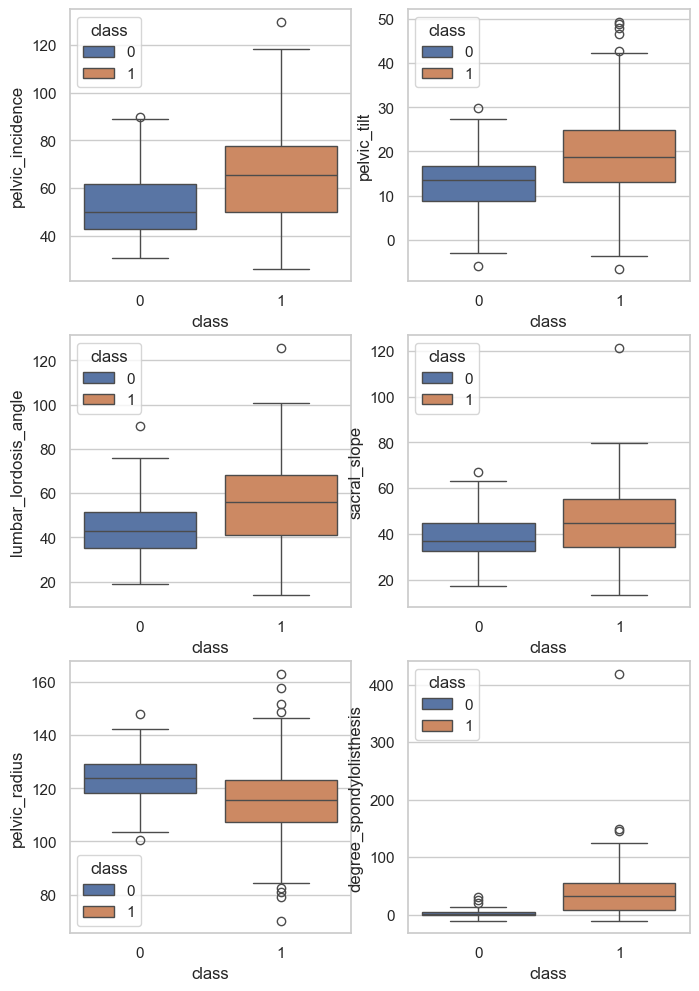

In [37]:
# Set up a 3x2 grid of subplots with specified figure size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))

# Plot a boxplot for each independent variable, grouped by class
sns.boxplot(data=df_label, x='class', y='pelvic_incidence', hue='class', ax=axes[0, 0], dodge=False)
sns.boxplot(data=df_label, x='class', y='pelvic_tilt', hue='class', ax=axes[0, 1], dodge=False)
sns.boxplot(data=df_label, x='class', y='lumbar_lordosis_angle', hue='class', ax=axes[1, 0], dodge=False)
sns.boxplot(data=df_label, x='class', y='sacral_slope', hue='class', ax=axes[1, 1], dodge=False)
sns.boxplot(data=df_label, x='class', y='pelvic_radius', hue='class', ax=axes[2, 0], dodge=False)
sns.boxplot(data=df_label, x='class', y='degree_spondylolisthesis', hue='class', ax=axes[2, 1], dodge=False)

# Display the plots
plt.show()

#### iii. Split Data Set

In [40]:
# Extract the training set for Class 0 (first 70 samples)
class0_train = df_label.loc[df_label['class'] == 0][:70]
# Extract the training set for Class 1 (first 140 samples)
class1_train = df_label.loc[df_label['class'] == 1][:140]
# Combine both class training sets and shuffle
train_set = pd.concat([class0_train, class1_train]).sample(frac=1)

# Separate features and labels for training
x_train = train_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                     'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_train = train_set[['class']]

# Extract the testing set for Class 0 (remaining samples after index 70)
class0_test = df_label.loc[df_label['class'] == 0][70:]
# Extract the testing set for Class 1 (remaining samples after index 140)
class1_test = df_label.loc[df_label['class'] == 1][140:]
# Combine both class testing sets and shuffle
test_set = pd.concat([class0_test, class1_test]).sample(frac=1)

# Separate features and labels for testing
x_test = test_set[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                    'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
y_test = test_set[['class']]

print("Number of Samples in Training dataset: " + str(len(x_train)))
print("Number of Samples in Testing dataset: " + str(len(x_test)))

Number of Samples in Training dataset: 210
Number of Samples in Testing dataset: 100


### (c) Classification

#### i. Euclidean Metric

In [42]:
model = KNeighborsClassifier(n_neighbors=3, p=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### ii. Test Data

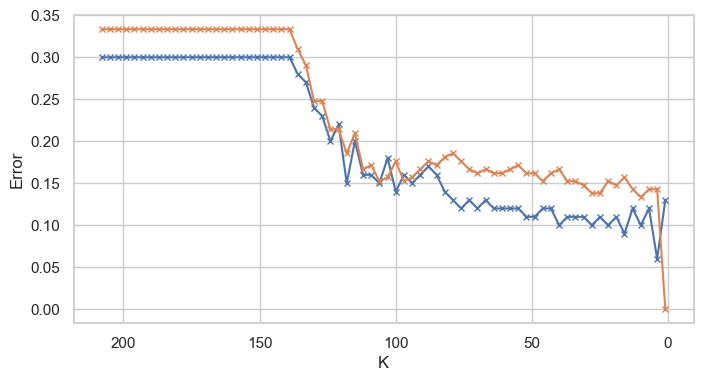

Optimal k is: 4
Least Test Error (rate) for k=4: 0.06


In [50]:
# Initialize empty lists for k values, training errors, and testing errors
k_values, train_error, test_error = [], [], []

# Set initial values for minimum test error and optimal k
minVal, optK = float('inf'), 1

# Loop through different values of k (starting from 208, decreasing by 3)
for k in range(208, 0, -3):
    
    # Append the current k value
    k_values.append(k)
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(x_train, y_train)
    Y_predict_test = model.predict(x_test)
    nCorrect = sum([1 for i in range(len(Y_predict_test)) if Y_predict_test[i] == y_test.iloc[i, 0]])  # Compare with class label
    testError = 1 - (nCorrect / len(Y_predict_test))
    test_error.append(testError)
    
    # Update the optimal k if the current test error is the least
    if testError < minVal:
        minVal = testError
        optK = k

    # Predict and calculate train error
    Y_predict_train = model.predict(x_train)
    nCorrect = sum([1 for i in range(len(Y_predict_train)) if Y_predict_train[i] == y_train.iloc[i, 0]])  # Compare with class label
    trainError = 1 - (nCorrect / len(Y_predict_train))
    train_error.append(trainError)

# Plot training and testing errors for different k values
plt.figure(figsize=(8,4))
plt.plot(k_values, test_error, marker='x', markersize=5, label="Testing Error")
plt.plot(k_values, train_error, marker='x', markersize=5, label="Training Error")
plt.gca().set_xlabel("K")  # Label the x-axis
plt.gca().set_ylabel("Error")  # Label the y-axis
plt.gca().invert_xaxis()  # Display the legend
plt.show()

# Output the optimal k and the corresponding minimum test error
print(f"Optimal k is: {optK}")
print(f"Least Test Error (rate) for k={optK}: {round(minVal, 2)}")

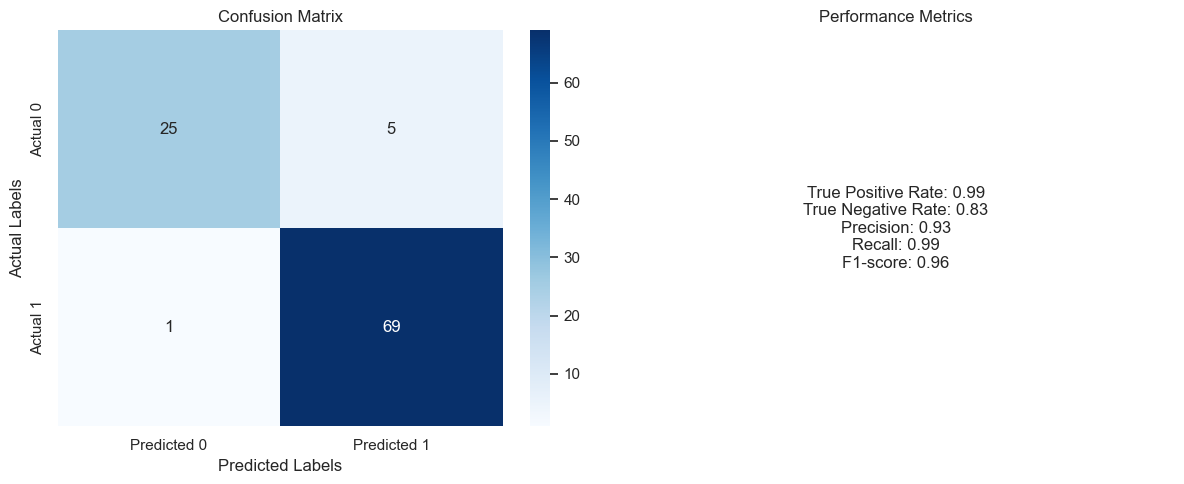

In [56]:
# Model training
bestK = 4
model = KNeighborsClassifier(n_neighbors=bestK, p=2)
model.fit(x_train, y_train)

Y_predict_test = model.predict(x_test)
confMatrix = confusion_matrix(y_test, Y_predict_test)
tn, fp, fn, tp = confMatrix.ravel()
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confMatrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"], ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("Actual Labels")

metrics_text = f"True Positive Rate: {round(TPR, 2)}\nTrue Negative Rate: {round(TNR, 2)}\nPrecision: {round(precision, 2)}\nRecall: {round(recall, 2)}\nF1-score: {round(f1_score, 2)}"
axes[1].text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
axes[1].axis("off")
axes[1].set_title("Performance Metrics")

plt.tight_layout()
plt.show()

#### iii. Learning Curve

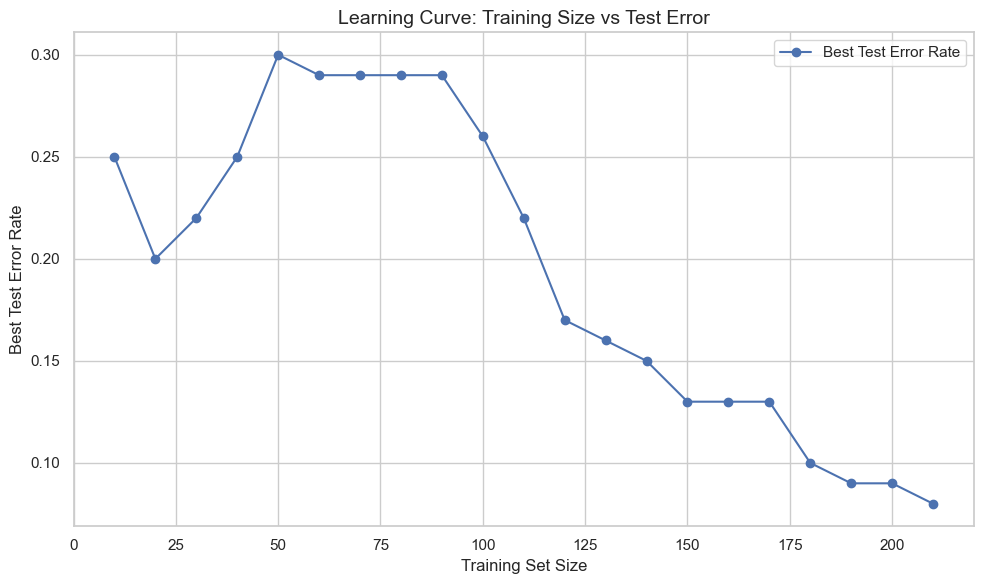

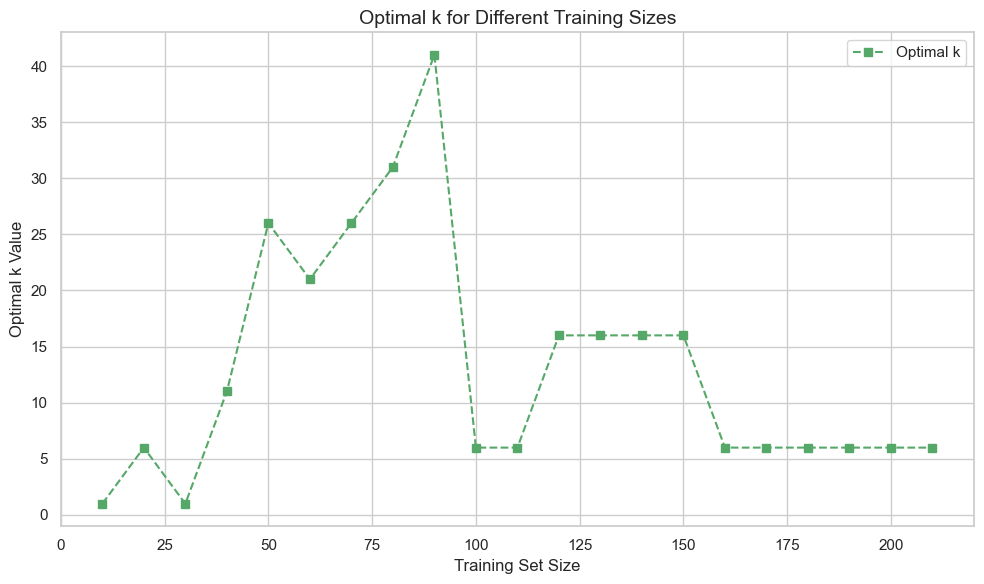

In [67]:
# Define training set sizes
training_sizes = list(range(10, 211, 10))
best_test_errors = {}  # Dictionary to store the lowest test error for each N
optimal_k_values = {}  # Dictionary to store the best K for each N

# Iterate over different training set sizes
for N in training_sizes:
    subset_class0 = class0_train[:math.floor(N/3)]
    subset_class1 = class1_train[:(N - math.floor(N/3))]
    
    # Combine and shuffle training set
    subset_train = pd.concat([subset_class0, subset_class1]).sample(frac=1)

    subset_X_train = subset_train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
                                   'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']]
    subset_Y_train = subset_train[['class']]

    k_values = list(range(1, N, 5))
    test_errors = []

    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k)  # Initialize classifier
        model.fit(subset_X_train, subset_Y_train.values.ravel())  # Train model
        test_error = 1 - model.score(x_test, y_test)  # Calculate test error
        test_errors.append(test_error)
    
    best_test_errors[N] = min(test_errors)
    optimal_k_values[N] = k_values[np.argmin(test_errors)]

# Plot best test error rate
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, best_test_errors.values(), marker='o', linestyle='-', color='b', label='Best Test Error Rate')
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Best Test Error Rate", fontsize=12)
plt.title("Learning Curve: Training Size vs Test Error", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot optimal K values for each training size
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, optimal_k_values.values(), marker='s', linestyle='--', color='g', label='Optimal k')
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Optimal k Value", fontsize=12)
plt.title("Optimal k for Different Training Sizes", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [80]:
# Initializing K Value
k_values = list(range(1, 197, 5))
test_errors = []

# Iterating over K Values
for k in k_values:
    neigh_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    neigh_manhattan.fit(x_train, y_train.values.ravel())
    test_errors.append(1 - neigh_manhattan.score(x_test, y_test))

# Find the index of the minimum test error, excluding k = 1
best_k_index = -1
min_test_error = float('inf')

# Iterate over test errors to exclude k = 1
for i in range(len(test_errors)):
    if test_errors[i] < min_test_error and k_values[i] != 1:
        min_test_error = test_errors[i]
        best_k_index = i

# Extract the best k corresponding to the minimum test error
best_k = k_values[best_k_index]

print('Best k =', best_k)
print('Test error =', min_test_error)

# Adding Information
summarize_test_error['Manhattan Distance'] = min(test_errors)

Best k = 6
Test error = 0.10999999999999999


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [83]:
# Initialize p values
p_values = [10**i for i in np.linspace(0.1, 1.0, 10)]
test_errors = []

# Iterate through p values
for p_value in p_values:
    # Declare KNN with logarithmic Manhattan Distance
    knn_log_manhattan = KNeighborsClassifier(n_neighbors=6, p=p_value)
    # Fit the model
    knn_log_manhattan.fit(x_train, y_train.values.ravel())
    # Append the test error to the list
    test_errors.append(1 - knn_log_manhattan.score(x_test, y_test))

# Find the minimum test error at different p values
for idx in range(len(test_errors)):
    if test_errors[idx] == min(test_errors):
        print(f"Optimal p = {p_values[idx]} with corresponding test error = {test_errors[idx]}")
        print(f"The best log10(p) = {math.log10(p_values[idx]):.2f}")

# Store the summary of the best test error for Log Manhattan Distance
summarize_test_error['Log Manhattan Distance'] = min(test_errors)

Optimal p = 3.9810717055349722 with corresponding test error = 0.06000000000000005
The best log10(p) = 0.60


##### C. Chebyshev Distance With p -> infinity.

In [86]:
# Set the range of K values
k_values = list(range(1, 197, 5))
test_errors = []

# Loop through each value of k
for k in k_values:
    # Initialize KNN with Chebyshev Distance (p = inf)
    chebyshev_knn = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    chebyshev_knn.fit(x_train, y_train.values.ravel())
    test_errors.append(1 - chebyshev_knn.score(x_test, y_test))

# Find the minimum test error and its corresponding k
for idx in range(len(test_errors)):
    if test_errors[idx] == min(test_errors):
        print(f"Optimal k = {k_values[idx]}, Test error = {test_errors[idx]:.4f}")

# Save the lowest test error for Chebyshev Distance
summarize_test_error['Chebyshev Distance'] = min(test_errors)

Optimal k = 16, Test error = 0.0800


#### ii. Mahalanobis Distance.

In [103]:
summarize_test_error['Mahalanobis Distance'] = min(test_errors)

# Obtaining covariance matrix of data
x = x_train.T
cov_matrix = np.cov(x_train, rowvar=False)
inverse_cov_matrix = np.linalg.pinv(cov_matrix)

# Initializing k values
k_values = list(range(1, 197, 5))
test_errors = []

for k in k_values:
    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, 
                                          metric='mahalanobis', 
                                          metric_params={'VI': inverse_cov_matrix})
    knn_mahalanobis.fit(x_train, y_train.values.ravel())
    test_errors.append(1 - knn_mahalanobis.score(x_test, y_test))

for idx in range(len(test_errors)):
    if test_errors[idx] == min(test_errors):
        print(f"k = {k_values[idx]}, Test error = {test_errors[idx]}")

summarize_test_error['Mahalanobis Distance'] = min(test_errors)

k = 1, Test error = 0.15000000000000002


In [106]:

table = pd.DataFrame(summarize_test_error.items(), columns=['Distance Name', 'Test Error'])
styled_table = table.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]}, 
     {'selector': 'tbody td', 'props': [('text-align', 'center'), ('background-color', '#f9f9f9')]},
     {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '50%')]},
     {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
    ]
)

display(styled_table)

,Distance Name,Test Error
0,Manhattan Distance,0.110000
1,Log Manhattan Distance,0.060000
2,Chebyshev Distance,0.080000
3,Mahalanobis Distance,0.150000


### (e) Weighted Decision

k = 6 test error = 0.09999999999999998


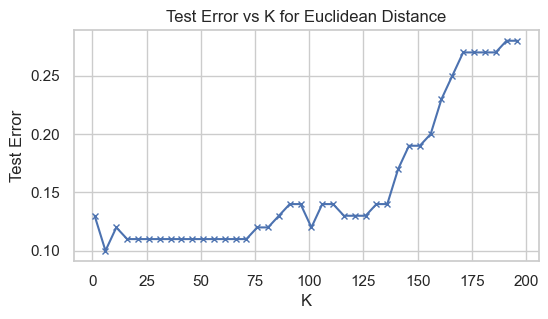

In [110]:
# Euclidean 

test_errors = list()

# Iterate over k
for k in k_values:
    # Declare KNN with Euclidean Distance
    neigh_euclidean = KNeighborsClassifier(n_neighbors=k, weights='distance')
    # Train model
    neigh_euclidean.fit(x_train, y_train.values.ravel())
    # Obtain test error
    test_errors.append(1 - neigh_euclidean.score(x_test, y_test))

# Find min test error at different k's
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print('k =', k_values[index], 'test error =', test_errors[index])

plt.figure(figsize=(6, 3))
plt.plot(k_values, test_errors, marker='x', markersize=5)
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Test Error")
plt.title("Test Error vs K for Euclidean Distance")
plt.show()

k = 26 test error = 0.09999999999999998


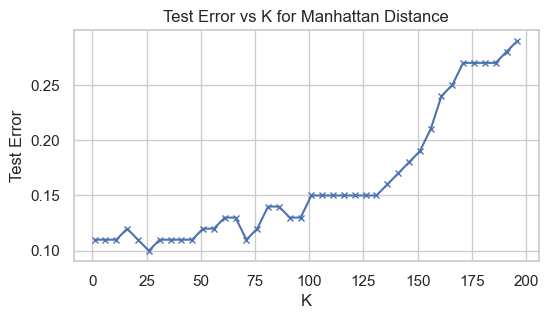

In [113]:
# Manhattan

test_errors = list()

# Iterate over k
for k in k_values:
    # Declare KNN with Manhattan Distance
    neigh_manhattan = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    # Train model
    neigh_manhattan.fit(x_train, y_train.values.ravel())
    # Obtain test error
    test_errors.append(1-neigh_manhattan.score(x_test, y_test))

# Find min test error at different k's
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print('k =', k_values[index], 'test error =', test_errors[index])

plt.figure(figsize=(6, 3))
plt.plot(k_values, test_errors, marker='x', markersize=5)
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Test Error")
plt.title("Test Error vs K for Manhattan Distance")
plt.show()

k = 16 test error = 0.10999999999999999
k = 31 test error = 0.10999999999999999
k = 36 test error = 0.10999999999999999
k = 41 test error = 0.10999999999999999
k = 61 test error = 0.10999999999999999


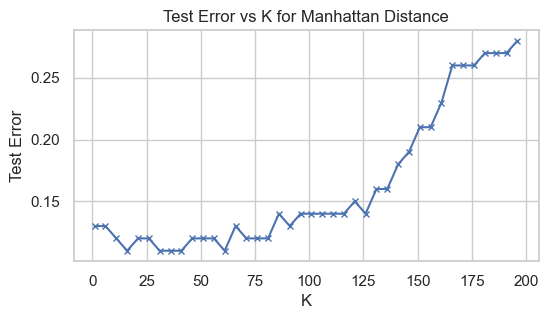

In [115]:
# Chebyshev

test_errors = list()

# Iterate over k
for k in k_values:
    # Declare KNN with Chebyshev Distance
    neigh_chebyshev = KNeighborsClassifier(n_neighbors=k, weights='distance', p=math.inf)
    # Train model
    neigh_chebyshev.fit(x_train, y_train.values.ravel())
    # Obtain test error
    test_errors.append(1-neigh_chebyshev.score(x_test, y_test))

# Find min test error at different k's
for index in range(0, len(test_errors)):
    if test_errors[index] == min(test_errors):
        print('k =', k_values[index], 'test error =', test_errors[index])

plt.figure(figsize=(6, 3))
plt.plot(k_values, test_errors, marker='x', markersize=5)
plt.gca().set_xlabel("K")
plt.gca().set_ylabel("Test Error")
plt.title("Test Error vs K for Manhattan Distance")
plt.show()

### (f) Training Error Rate

The lowest training error rate of 0 occurs when k=1 because each data point is its own nearest neighbor, leading to perfect predictions. This happens as the training set is used for testing, resulting in no errors.